# Analysis and visualisation of Essex population and transport by ward
<br>
<b>Data must be obtain from different sources:</b>
<br>
- LSOA boundaries (https://datashare.ed.ac.uk/handle/10283/2546)
<br>
- LSOA population
(https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/lowersuperoutputareamidyearpopulationestimates)

<b>Sources that gave ideas:</b>
<br>
https://www.citypopulation.de/en/uk/eastofengland/
<br>
http://darribas.org/gds15/content/labs/lab_03.html
<br>

<b>Sources to double check the data consistency:</b>
<br>
https://en.wikipedia.org/wiki/Essex

## To do

- Investigate on passenger compared to population<br>
- Get area built as some ward are big to get better estimate of population localisation<br>
- Calculate amount of population (# and %) within 2 miles from station<br>
https://labs.os.uk/public/os-data-hub-tutorials/data-science/price-paid-spatial-distribution


## Import libraries

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon # Required to use "overlay" https://gist.github.com/korakot/1cc3764602628dfdfcfe586305c31788
import Functions as fcn # custom functions

## Load datasets previously prepared and saved as pickle

In [2]:
boundariesPopulationLSOAEssex = pd.read_pickle("./01_Data/02_Preprocessed/boundariesPopulationLSOAEssex.pkl")
trainStationEssex = pd.read_pickle("./01_Data/02_Preprocessed/trainStationEssex.pkl")

## Analysis and visualisation

In [3]:
boundariesPopulationLSOAEssex['AREA_km2'] = boundariesPopulationLSOAEssex['geometry'].area/10**6
boundariesPopulationLSOAEssex['density'] = round(boundariesPopulationLSOAEssex['All Ages']/boundariesPopulationLSOAEssex['AREA_km2'],2)
boundariesPopulationLSOAEssex.head()

,LSOA11CD,LSOA11NM,geometry,LSOA Code,LSOA Name,LA Code (2019 boundaries),LA name (2019 boundaries),All Ages,AREA_km2,density
0,E01022006,Tendring 002C,"POLYGON ((624232.454 231254.095, 624233.006 23...",E01022006,Tendring 002C,E07000076,Tendring,1860,0.436835,4257.90
1,E01022087,Uttlesford 005F,"POLYGON ((551345.426 224304.625, 551346.745 22...",E01022087,Uttlesford 005F,E07000077,Uttlesford,2898,4.167389,695.40
2,E01022007,Tendring 002D,"POLYGON ((623718.870 231191.886, 623707.172 23...",E01022007,Tendring 002D,E07000076,Tendring,1861,0.590177,3153.29
3,E01022086,Uttlesford 006A,"POLYGON ((551449.852 224303.744, 551441.643 22...",E01022086,Uttlesford 006A,E07000077,Uttlesford,1762,8.286341,212.64
4,E01022004,Tendring 004D,"MULTIPOLYGON (((623415.943 230599.882, 623418....",E01022004,Tendring 004D,E07000076,Tendring,1752,1.104879,1585.69


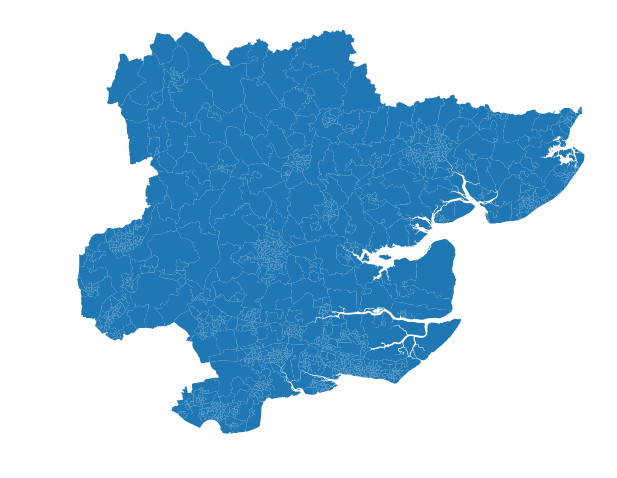

In [4]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax = boundariesPopulationLSOAEssex.plot(ax=ax)
ax.set_axis_off()

In [5]:
print('Total population Essex: ' + str(boundariesPopulationLSOAEssex['All Ages'].sum()))
print('Total area Essex [km2]: ' + str(round(boundariesPopulationLSOAEssex['AREA_km2'].sum(),2)))
print('Total population density Essex [/km2]: ' + str(round(boundariesPopulationLSOAEssex['All Ages'].sum()/boundariesPopulationLSOAEssex['AREA_km2'].sum(),2)))
print("""Due to the need to project the earth to a 2D plane, the area calculated might differ a bit from the measured area (3,670 km2, https://en.wikipedia.org/wiki/Essex). 
However, the difference is lower when calculated from LSOA because the areas are smaller hence the effect of the Earth
curvature is reduced compared to area calculation with ward boundaries.""")

Total population Essex: 1846655
Total area Essex [km2]: 3677.09
Total population density Essex [/km2]: 502.21
Due to the need to project the earth to a 2D plane, the area calculated might differ a bit from the measured area (3,670 km2, https://en.wikipedia.org/wiki/Essex). 
However, the difference is lower when calculated from LSOA because the areas are smaller hence the effect of the Earth
curvature is reduced compared to area calculation with ward boundaries.


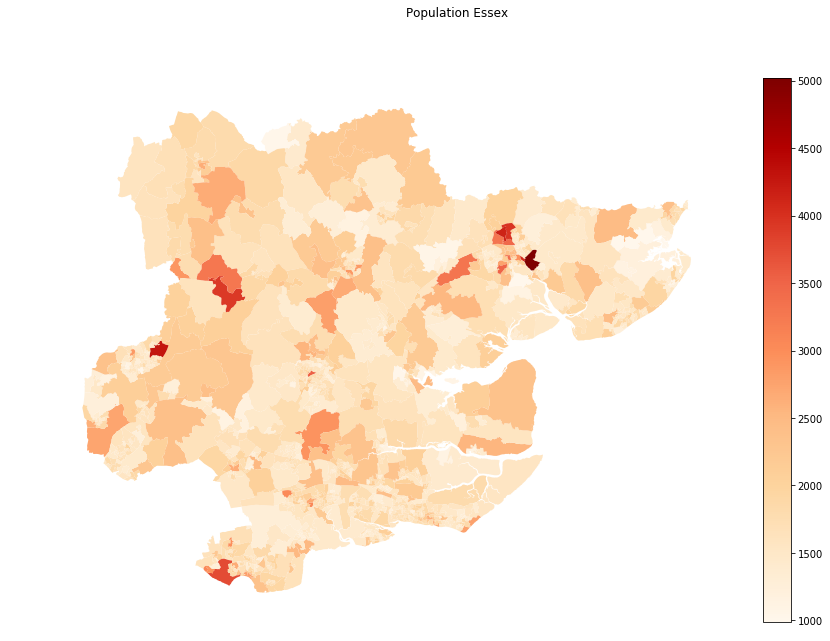

In [6]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax = boundariesPopulationLSOAEssex.plot(ax=ax,column='All Ages', cmap='OrRd',legend=True)
ax.set_axis_off()
fig.suptitle('Population Essex')
plt.show()

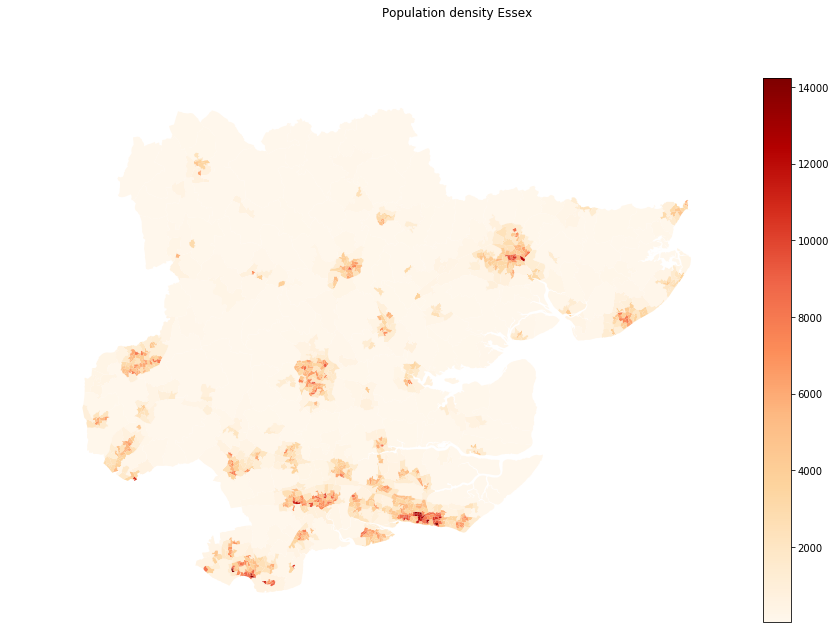

In [7]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax = boundariesPopulationLSOAEssex.plot(ax=ax,column='density', cmap='OrRd',legend=True)
ax.set_axis_off()
fig.suptitle('Population density Essex')
plt.show()

In [8]:
# Population distribution

In [15]:
minBin = fcn.calculateMinMaxLogScale(boundariesPopulationLSOAEssex['All Ages'].min(),'Min')

In [16]:
maxBin = fcn.calculateMinMaxLogScale(boundariesPopulationLSOAEssex['All Ages'].max(),'Max')

In [20]:
populationBins = fcn.createLogBin(minBin, maxBin)
populationBins

[100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000]

In [11]:
boundariesPopulationLSOAEssex['All Ages'].min()

987

AttributeError: 'Figure' object has no attribute 'xscale'

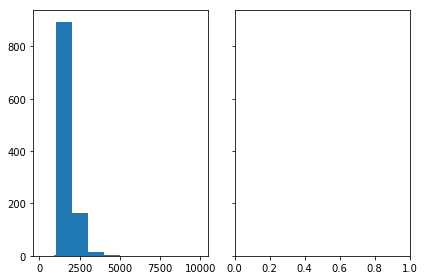

In [24]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(boundariesPopulationLSOAEssex['All Ages'], bins=populationBins)
#axs[1].hist(boundariesPopulationLSOAEssex['AREA_km2'], bins=n_bins)
fig.xscale('log')

In [ ]:
# LSOA boundaries distribution

In [ ]:
# Train station

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax = boundariesPopulationLSOAEssex.plot(ax=ax,column='All Ages', cmap='OrRd',legend=True)
trainStationEssex.plot(ax=ax, color='blue')
ax.set_axis_off()
fig.suptitle('Population Essex with train station localisation')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax = boundariesPopulationLSOAEssex.plot(ax=ax,column='density', cmap='OrRd',legend=True)
trainStationEssex.plot(ax=ax, color='blue')
ax.set_axis_off()
fig.suptitle('Population density Essex with train station localisation')
plt.show()

In [ ]:
# Add buffer of 1 mile around station

In [ ]:
circleRadius = 1609.344 # in meters
bufferStation = trainStationEssex.geometry.buffer(circleRadius)
bufferUnion = bufferStation.geometry.unary_union # Combine all the buffer circle
bufferUnion_gdf = gpd.GeoDataFrame(pd.DataFrame(data = {'geometry': bufferUnion}), crs="epsg:27700")

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax = boundariesPopulationLSOAEssex.plot(ax=ax,column='All Ages', cmap='OrRd',legend=True)
bufferUnion_gdf.plot(color="lightgreen", alpha = 0.3, edgecolor = "darkgreen", linewidth = 2,ax=ax)
ax.set_axis_off()
fig.suptitle('Population Essex with area within a mile from train station')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax = boundariesPopulationLSOAEssex.plot(ax=ax,column='density', cmap='OrRd',legend=True)
bufferUnion_gdf.plot(color="lightgreen", alpha = 0.3, edgecolor = "darkgreen", linewidth = 2,ax=ax)
ax.set_axis_off()
fig.suptitle('Population density Essex with area within a mile from train station')
plt.show()

In [ ]:
# % of population within 1 mile away from station

In [ ]:
intersectionLSOABuffer_gdf = gpd.overlay(boundariesPopulationLSOAEssex[['geometry','All Ages','density','AREA_km2','LSOA11CD']], bufferUnion_gdf, how='intersection') 
intersectionLSOABuffer_gdf['NewArea_km2'] = intersectionLSOABuffer_gdf.geometry.area/10**6
intersectionLSOABuffer_gdf['NewArea_%'] = round(intersectionLSOABuffer_gdf['NewArea_km2']/intersectionLSOABuffer_gdf['AREA_km2'],3)
intersectionLSOABuffer_gdf['NewAll Ages'] = round(intersectionLSOABuffer_gdf['All Ages']*intersectionLSOABuffer_gdf['NewArea_%'],0)
intersectionLSOABuffer_gdf['Newdensity'] = round(intersectionLSOABuffer_gdf['NewAll Ages']/intersectionLSOABuffer_gdf['NewArea_km2'],2)
intersectionLSOABuffer_gdf.head()

In [ ]:
intersectionLSOABuffer_gdf['NewAll Ages'].sum()

In [ ]:
populationLSOABuffer_gdf = intersectionLSOABuffer_gdf[['LSOA11CD','NewArea_km2']].groupby('LSOA11CD').sum().reset_index()
#populationLSOABuffer_gdf = populationLSOABuffer_gdf[['LSOA11CD','NewArea_%']]
# populationLSOABuffer_gdf = populationLSOABuffer_gdf.drop('geometry', axis=1)
populationLSOABuffer_gdf = boundariesPopulationLSOAEssex[['LSOA11CD','geometry','AREA_km2','All Ages','density']].merge(populationLSOABuffer_gdf, on='LSOA11CD',how='left')
populationLSOABuffer_gdf = populationLSOABuffer_gdf.fillna(0)
populationLSOABuffer_gdf['NewArea_%'] = round(populationLSOABuffer_gdf['NewArea_km2']/populationLSOABuffer_gdf['AREA_km2']*100,2)
populationLSOABuffer_gdf.head()

In [ ]:
populationLSOABuffer_gdf['All Ages'].sum()

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax = populationLSOABuffer_gdf.plot(ax=ax,column='NewArea_%', cmap='OrRd',legend=True)#,edgecolor="black")
trainStationEssex.plot(ax=ax, color='blue')
ax.set_axis_off()
fig.suptitle('Essex population % within a mile from train station')
plt.show()

In [ ]:
plt.scatter(populationLSOABuffer_gdf['All Ages'],populationLSOABuffer_gdf['NewArea_%'])

In [ ]:
plt.scatter(populationLSOABuffer_gdf['density'],populationLSOABuffer_gdf['NewArea_%'])

In [ ]:
# Calculate area of city and buffer around metro
areaRennes = round(quartierRennes_gdf.geometry.to_crs(epsg=2192).area.sum()/10**6,2)
print('Surface de Rennes: ' + str(areaRennes) + 'km2') # Search for the correct projection code https://spatialreference.org/ref/epsg/?search=france&srtext=Search
print('Zone a moins de 500m du metro: ' + str(round(bufferUnion_gdf.geometry.to_crs(epsg=2192).area.sum()/10**6,2)) + 'km2')

# Get the polygon where "quartier" and buffer intersect  https://geopandas.org/set_operations.html
intersectionQuartierBuffer_gdf = gpd.overlay(quartierRennes_gdf[['geometry']], bufferUnion_gdf, how='intersection') 
# Calculate area of Rennes covered by buffer
areaBuffer = round(intersectionQuartierBuffer_gdf.geometry.to_crs(epsg=2192).area.sum()/10**6,2)
print('Surface de Rennes à 500m du métro: ' + str(areaBuffer) + 'km2 (' + str(round(areaBuffer/areaRennes*100,2)) + '%)')

## AOB at region level

In [ ]:
data = gpd.read_file("./01_Data/bdline_gpkg_gb/Data/GB/district_borough_unitary_region.shp",rows=20)
data.head()

In [ ]:
data = gpd.read_file("./01_Data/bdline_gpkg_gb/Data/GB/district_borough_unitary_region.shp")
data.head()

In [ ]:
dataFiltered = data[data['FILE_NAME'] == 'ESSEX_COUNTY']

In [ ]:
dataFiltered.plot(figsize=(10,10))

# AOB previous work

In [ ]:
nbColor = 10
custom_colors = fcn.linear_gradient("#FACBC1","#E34F2F",nbColor)['hex']
dataframeColumn = 'All Ages'

In [ ]:
def polyColor(val):
    if val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.1):
        color = custom_colors[0]
    elif val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.2):
        color = custom_colors[1]
    elif val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.3):
        color = custom_colors[2]
    elif val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.4):
        color = custom_colors[3]
    elif val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.5):
        color = custom_colors[4]
    elif val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.6):
        color = custom_colors[5]
    elif val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.7):
        color = custom_colors[6]
    elif val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.8):
        color = custom_colors[7]
    elif val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.9):
        color = custom_colors[8]
    elif val >= boundariesPopulationEssexPKL[dataframeColumn].quantile(0.9):
        color = custom_colors[9]
    return color

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax = boundariesPopulationEssexPKL.plot(ax=ax, color = [polyColor(boundariesPopulationEssexPKL['All Ages'][x]) for x in range(0,len(boundariesPopulationEssexPKL))])
ax.set_axis_off()
fig.suptitle('Population Essex')
plt.show()